# Randomness ?and chaos?:

Simpler:
- Explore some random number generators in python
- Numerically demonstrate relation between binomial and normal distributions
- Discuss utility of generators in python

Meso:
- What is randomness? -> What metrics are there for detecting non/randomness?
- Look at existing RNGs - do they measure up?
- Construct your own RNG - how does it perform?
- How do you construct uniform samplers on more interesting spaces?
- Create a uniform sampler within a disk. 

Deep:
- What is randomness?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# TRY: Look through the np.random module and test a few random sampling functions.
for i in range(5):
    
#     x = np.random.standard_normal(size=(3,))
#     x = np.random.randint(low=2, high=8, size=(2,4))
    x = np.random.uniform(1.0, 3.0, size=(4,))
    print(x)

[1.7247512  1.20909344 2.83586327 2.33009278]
[1.95084703 2.63193565 1.85748011 1.40857404]
[2.609291   2.81231738 2.890129   2.49619177]
[1.01389753 2.09628208 1.87022822 2.61553615]
[1.3880583  1.26533178 2.66485182 2.66587744]


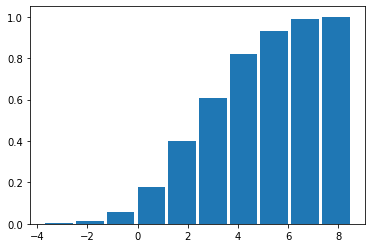

In [26]:
# TRY: Make a histogram using np.random.normal

num = 10**3
loc = 3.0
scale = 2.0 
samples = np.random.normal(loc=loc, scale=scale, size=num)

fig = plt.figure()
ax = plt.gca()

n, bins, patches = plt.hist(samples, bins=10, rwidth=0.9, density=True, cumulative=True)

In [27]:
# Explore these return values
# n
# bins
# patches

array([0.003, 0.015, 0.058, 0.178, 0.4  , 0.606, 0.82 , 0.933, 0.988,
       1.   ])

In [45]:
# Flip a coin many times. Return the sequence of 'H' and 'T'.
# Allow for "unfairness"

def sample_coin(prob_heads=0.5, num=10):
    # Return a list of coin flips, 'H' and 'T'.
    uniforms = np.random.random(size=num)
    coins = ['H' if u < prob_heads else 'T' for u in uniforms]
    return coins

def num_heads(prob_heads=0.5, num=10):
    uniforms = np.random.random(size=num)
    num_heads = np.sum(uniforms < prob_heads)
    return num_heads

In [44]:
#sample_coin()
num_heads()

5

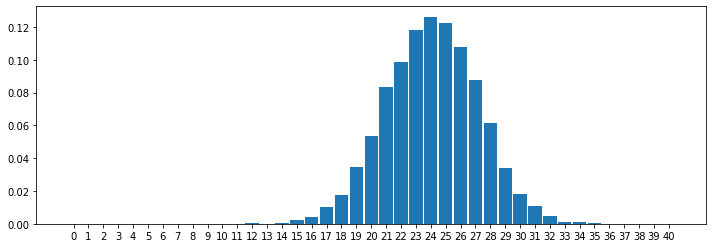

In [80]:
# Over many samples, the number of "heads" is typically near num*prob_heads, but fluctuates.
# TRY: Plot a histogram of this behavior.

# NOTE: If you run this a dozen times, you will find cases where one of the largest bars disappears - what's going on here?

num_samples = 10**4
flips_per_sample = 40
prob_heads = 0.6

num_Hs = []

for ind in range(num_samples):
    x = num_heads(prob_heads=prob_heads, num=flips_per_sample)
    num_Hs.append(x)
    
fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

n, bins, patches = plt.hist(num_Hs, bins=40, rwidth=0.9, density=True)

# bin_edges = [x - 0.5 for x in range(flips_per_sample + 2)]
# n, bins, patches = plt.hist(num_Hs, bins=bin_edges, rwidth=0.9, density=True)

ax.set_xticks(range(flips_per_sample + 1));

In [64]:
edges

[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]